In [1]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 430 (delta 48), reused 31 (delta 9), pack-reused 326
Receiving objects: 100% (430/430), 3.43 MiB | 6.38 MiB/s, done.
Resolving deltas: 100% (228/228), done.
/content/WalkRNN
Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [2]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    495      0 --:--:-- --:--:-- --:--:--   495
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [4]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7602 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run t

In [5]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [6]:
!ls

Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [0]:
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels, transform_graph


Gkern = load_graph_kernel_graph("./examples/data/IMDB-MULTI")
y = load_graph_kernel_labels("./examples/data/IMDB-MULTI")


DONE


In [10]:
Gkern.nodes[12]

{'component': 2}

In [11]:
#Transform networkx property graph into a format prepared for WalkRNN
G, current_vocab_size = transform_graph(Gkern, params={'num_kmeans_clusters': 4, "num_pca_components": 6, "num_batch":500, 'num_att_kmeans_clusters': 10})

finished graphwave_alg batches


In [12]:
G.nodes[12]

{'component': 2, 'structure': 1}

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=3)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

7


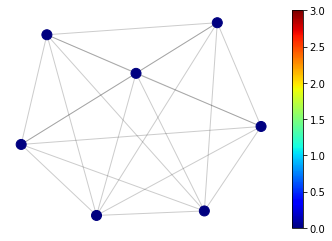

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}


In [14]:

plotGW(G,1)

13


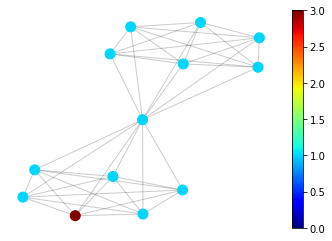

{8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 3, 17: 1, 18: 1, 19: 1, 20: 1}


In [15]:
plotGW(G,2)

7


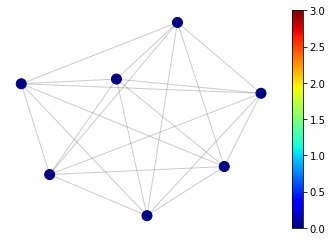

{21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0}


In [16]:
plotGW(G,3)

11


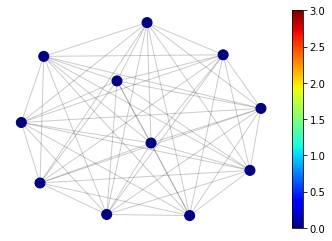

{2080: 0, 2081: 0, 2082: 0, 2083: 0, 2084: 0, 2085: 0, 2086: 0, 2087: 0, 2077: 0, 2078: 0, 2079: 0}


In [17]:
plotGW(G,151)

8


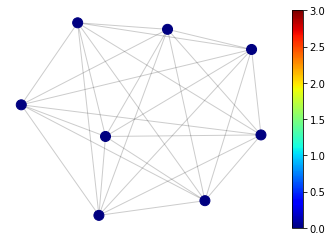

{103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0}


In [18]:
plotGW(G,11)

26


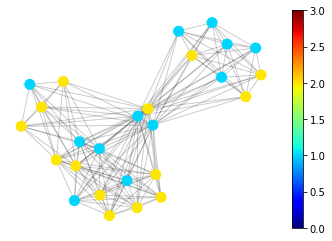

{2191: 1, 2192: 1, 2193: 1, 2194: 1, 2195: 2, 2196: 2, 2197: 2, 2198: 2, 2199: 1, 2200: 1, 2201: 2, 2202: 1, 2203: 2, 2204: 1, 2205: 2, 2206: 2, 2207: 2, 2208: 1, 2209: 2, 2210: 1, 2211: 2, 2212: 2, 2213: 2, 2214: 1, 2215: 2, 2216: 1}


In [19]:
plotGW(G,160)

7


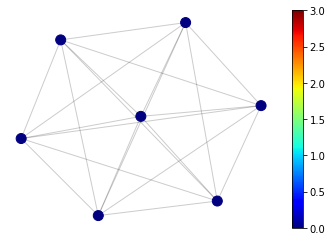

{195: 0, 196: 0, 197: 0, 198: 0, 199: 0, 200: 0, 201: 0}


In [20]:
plotGW(G,18)

11


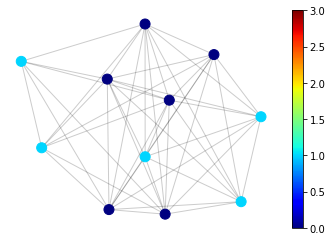

{1960: 0, 1961: 1, 1962: 1, 1963: 1, 1964: 0, 1965: 0, 1966: 0, 1967: 0, 1968: 0, 1969: 1, 1970: 1}


In [21]:
plotGW(G,140)

In [0]:
from module import walk_as_string

In [23]:
walks = walk_as_string(G, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[1 7 1 7 1 3 7 3 6 4 1 2 4 6 2 5 3 6 5 2 5 7 2 3 5 2 1 5 4 7]
[1 5 7 6 2 3 4 5 7 1 2 1 7 1 5 6 3 1 5 1 5 7 2 4 3 4 6 4 6 1]
[1 3 7 2 5 2 4 1 4 6 5 6 4 1 6 5 1 3 5 3 6 1 3 4 6 3 7 4 1 6]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [25]:
walks.head()

,walk,label,start_node,component
0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,1
1,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,1
2,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,1
3,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,1
4,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,1


In [26]:
walks.shape

(390040, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [28]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(281560, 4)

In [29]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(34560, 4)

In [30]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(73920, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [34]:
!ls -l ./result

total 107596
-rw-r--r-- 1 root root 110174352 Sep 30 22:09 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [36]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0
1,0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0
2,xxwrep 4 1 2 xxbos 2 2 2 1 2 1 2 2 1 1 2 2 1 xxwrep 4 2 1 2 2 1 1 1 xxwrep 6 2 2 xxbos 2 3 xxwrep 7 2 1 1 2 3 2 1 3 2 2 1 2 1 xxwrep 4 2 3 2 1 2 2 xxbos 2 2 1 xxwrep 6 2 1 3 2 1 2 2
3,20 1 1 xxbos xxwrep 5 1 0 1 0 1 0 xxwrep 8 1 3 xxwrep 7 1 3 1 1 0 xxbos 1 1 0 1 0 xxwrep 6 1 0 xxwrep 11 1 3 1 1 0 3 1 1 xxbos xxwrep 4 1 0 xxwrep 16 1 0 3 xxwrep 6 1 1 xxbos 1 0 xxwrep 4 1 0 1 0 xxwrep 11 1 0
4,2 2 1 2 2 1 2 1 2 1 xxwrep 8 2 1 1 2 1 1 2 1 2 2 2 xxbos 1 1 2 1 2 xxwrep 7 1 xxwrep 6 2 1 2 2 2 1 2 1 1 1 2 1 2 xxbos 1 2 1 2 2 1 2 1 1 1 xxwrep 4 2 1 xxwrep 4 2 1 1 2 1 1


In [0]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,1.003807,0.925975,0.623682,01:05


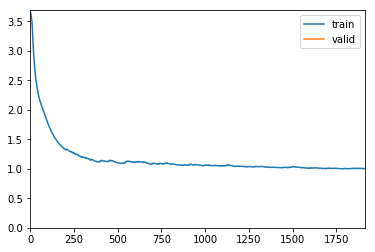

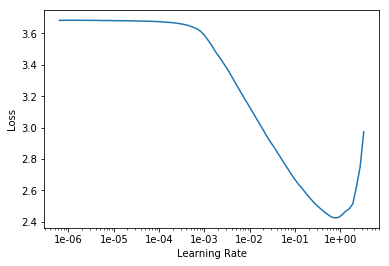

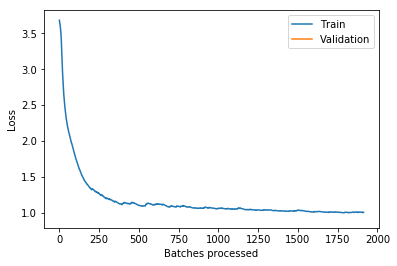

In [38]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


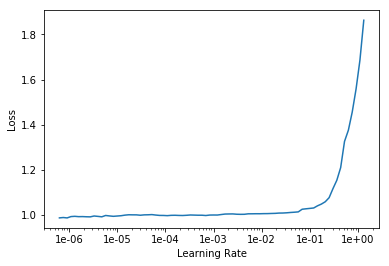

In [39]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.009874,0.936290,0.618575,01:06
1,1.015465,0.937564,0.614121,01:05
2,0.996756,0.924689,0.620987,01:05
3,0.979153,0.910464,0.624263,01:05
4,0.968291,0.892190,0.632268,01:05
5,0.954231,0.886190,0.633921,01:05


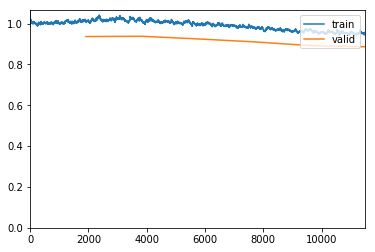

In [40]:
learn.fit_one_cycle(6, .01, moms=(0.8,0.7))

In [0]:
learn.save('fit-head')

In [0]:
learn.save_encoder('fine_tuned_enc3')

In [43]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN
3047,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,5,1,3047,1.0
4793,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,7,1,4793,2.0
14717,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,3,1,14717,3.0
23095,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,4,1,23095,4.0
27696,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,6,1,27696,5.0


Choose a path per node and concatenate for entire component

In [44]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,1,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2,1,1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1...
3,1,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,1,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
5,1,0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1...


In [45]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,1,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1
2,1,1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1...,2
3,1,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,3
4,1,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,4
5,1,0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1...,5


In [46]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((1080, 3), (270, 3), (150, 3), 0.72)

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [50]:
data_clas.show_batch()

text,target
xxbos 2 0 2 0 2 0 2 1 2 0 2 1 0 0 1 2 0 2 2 0 2 0 1 2 1 2 2 2 0 0 xxunk 1 0 2 1 2 1 0 2 xxwrep 4 0 2 1 0 2 2 0 1 0 2 0 2 0 2 2 0 1 2 2 xxunk 1 0 0 2 1 0 2 2,3
xxbos 3 1 2 1 2 2 3 2 2 3 2 1 2 1 3 2 1 2 2 3 2 1 1 3 2 2 3 3 2 2 xxunk 2 1 1 3 2 2 3 1 2 1 1 2 3 2 3 1 2 2 3 1 3 3 2 3 1 3 3 2 3 3 xxunk 1 1 3 3 2 3 2,3
xxbos 1 1 0 1 1 1 0 1 0 1 0 1 3 0 1 0 0 1 0 0 3 0 3 1 0 1 3 0 1 0 xxunk 0 1 0 1 3 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 3 0 1 0 xxunk 1 0 0 1 1 0 1,2
xxbos xxwrep 4 0 1 xxwrep 5 0 1 0 0 1 0 1 0 0 1 xxwrep 4 0 1 1 0 0 1 1 0 xxunk 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 xxunk 1 0 1 1 0 0 1 0 1 1 0,1
xxbos 3 1 1 2 1 1 2 1 1 1 2 3 xxwrep 4 2 3 1 1 3 1 3 1 2 2 3 1 2 1 1 xxunk 1 2 1 1 2 1 1 1 2 1 2 1 2 3 1 3 2 1 3 2 1 1 2 1 1 2 1 3 1 1 xxunk 1 1 1 2 2 1 2 3,3


In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [53]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


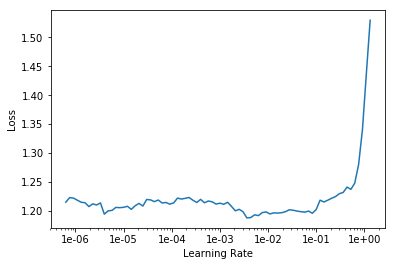

In [54]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.194649,1.063249,0.481481,00:01


In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [57]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.144717,1.118922,0.314815,00:01


In [58]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,1.088754,1.096300,0.355556,00:02
1,1.088621,1.082690,0.351852,00:02
2,1.075776,1.050498,0.459259,00:02
3,1.070803,1.035587,0.481481,00:02
4,1.064950,1.043317,0.474074,00:02
5,1.063980,1.044572,0.396296,00:02
6,1.061510,1.032609,0.474074,00:02
7,1.063586,1.036374,0.466667,00:02


In [59]:
predict(test,learn)

(150, 63, 0.42)


In [60]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.049573,1.032466,0.474074,00:02
1,1.058047,1.034649,0.470370,00:03
2,1.055935,1.022165,0.474074,00:02
3,1.050529,1.019767,0.433333,00:02
4,1.054433,1.014872,0.477778,00:02
5,1.051698,1.019928,0.503704,00:02
6,1.059136,1.024310,0.470370,00:02
7,1.060156,1.019743,0.488889,00:02
8,1.056873,1.012662,0.492593,00:02
9,1.054143,1.012832,0.481481,00:02


In [61]:
predict(test,learn)

(150, 67, 0.44666666666666666)


In [62]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.061641,1.015513,0.477778,00:02
1,1.043862,1.012626,0.488889,00:02
2,1.043586,1.007565,0.485185,00:02
3,1.053554,1.011247,0.492593,00:02
4,1.038764,1.010285,0.518519,00:02
5,1.043753,1.011006,0.503704,00:02
6,1.052183,1.021208,0.492593,00:02
7,1.049059,1.019716,0.433333,00:03
8,1.045472,1.010499,0.511111,00:03
9,1.046663,1.009075,0.511111,00:02


In [63]:
predict(test,learn)

(150, 71, 0.47333333333333333)


In [64]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.053506,1.008506,0.507407,00:02
1,1.046727,1.011234,0.514815,00:02
2,1.052445,1.019031,0.503704,00:02
3,1.049469,1.001765,0.511111,00:02
4,1.045844,1.007884,0.525926,00:02
5,1.039733,0.994081,0.507407,00:02
6,1.046120,1.014679,0.411111,00:02
7,1.050584,1.011116,0.411111,00:02
8,1.052579,1.012144,0.414815,00:02
9,1.048388,1.011620,0.414815,00:02


In [65]:
predict(test,learn)

(150, 70, 0.4666666666666667)


In [66]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.044045,0.999810,0.492593,00:02
1,1.040542,0.996985,0.488889,00:02
2,1.047182,0.999609,0.488889,00:02
3,1.049361,1.013769,0.500000,00:02
4,1.050149,1.003627,0.518519,00:02
5,1.047709,1.004855,0.492593,00:02
6,1.050695,1.004156,0.492593,00:02
7,1.045926,1.005638,0.522222,00:02
8,1.041294,1.007682,0.522222,00:02
9,1.041391,1.003133,0.525926,00:02


In [67]:
predict(test,learn)

(150, 68, 0.4533333333333333)


In [68]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.028158,1.008221,0.518519,00:02
1,1.029149,1.004828,0.503704,00:02
2,1.041817,1.013989,0.500000,00:02
3,1.038229,1.011353,0.444444,00:02
4,1.033649,1.004143,0.511111,00:02
5,1.028268,1.006963,0.437037,00:03
6,1.037227,1.014367,0.444444,00:02
7,1.044698,1.009421,0.429630,00:02
8,1.041969,1.012979,0.422222,00:02
9,1.039990,1.010720,0.496296,00:02


In [69]:
predict(test,learn)

(150, 67, 0.44666666666666666)


In [70]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.031553,1.004933,0.440741,00:02
1,1.023805,1.011415,0.451852,00:02
2,1.033957,1.000801,0.448148,00:02
3,1.035032,1.005342,0.514815,00:02
4,1.047833,1.012195,0.444444,00:02
5,1.048251,1.021981,0.444444,00:02
6,1.040237,1.015597,0.440741,00:03
7,1.034863,1.007288,0.444444,00:02
8,1.030868,0.995356,0.514815,00:02
9,1.028563,0.995866,0.518519,00:02


In [71]:
predict(test,learn)

(150, 69, 0.46)


In [72]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(40, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(40, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1, inplace=False)
      (6): Linear(in_features=50, out_features=3, bias=True)
    )
  )
)